<a href="https://colab.research.google.com/github/FSenciani/Dados-Python---Pandas-Matplotlib-Numpy./blob/main/MATERIAL_TESTE_DADOS_ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
!pip3 install pandas matplotlib numpy seaborn

In [306]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

# Load Data


In [307]:
pd.set_option('display.max_columns', 100)

In [308]:
df = pd.read_csv('dados_enem_2021_BA.csv')

In [309]:
df.shape

(4492, 51)

No Pandas podemos carregar dados de diferentes formatos. Os principais são :

CSV
Excel
SQL
Usando PySpark um formato muito utilizado é o parquet. Veremos este ponto mais adiante.

De igual modo podemos escrever os arquivos em diferentes formatos (output).

Na prática o formato de dados que iremos trabalhar vai depender muito da origem dos dados, da estrutura da empresa que estaremos trabalhando, etc.


# Microdados ENEM

Grupos de variáveis

Dados do participante
Dados da escola
Dados do local de aplicação da prova
Dados da prova objetiva
Dados da redação
Dados do questionário socioeconômico

Desafio :Elaborar um gráfico de pareto com os estados e as maiores notas.

# Inspeção de Dados


Hipótese levantadas

Padrões espaciais afetam o desempenho escolar?
Características municipais afetam o desempenho escolar?
Renda familiar pode afetar a nota dos alunos?
Há diferença de desempenho entre escolar públicas e privadas?
Qual matéria tem maior nota naquela região?

In [310]:
# leitura das 5 primeiras linhas
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0


In [311]:
df.head(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
6,210053741476,2021,6,F,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,453.4,438.3,503.4,379.5,BCDBECADBCCDCEBBBCEDCBCEBACDBEEAEDCDBCAACEEBD,BDDCABAEEAA

In [312]:
# leitura das 5 últimas linhas
df.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
4487,210053743774,2021,4,F,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2919207,Lauro de Freitas,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,481.0,521.4,457.9,360.4,DBDBEBCBEBEDBACBEBDEBCBEBADBAABCEDAACBCBDBCAB,EEDDDCCDEBDBBDBACCBBAEBCBDEECDDABBADAADECAEBB,99999EBAECEEDCBBADAADBEAABAEDDBBACBABAAAEBEDAD...,CBBBACBDCBDD*BCBDDCBDCEBBCDDBACCABBDBACCBACDC,1.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,100.0,160.0,120.0,140.0,180.0,700.0
4488,210051745539,2021,11,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925303,Porto Seguro,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,479.8,559.0,531.1,506.7,BBCEEDBEAEDBCDBDCBAEBEDCBDBABEECDCDEDDDCDDCDE,BEEAEEEBDAEBDAEAEBDEDECBBCBAEAAEADBCBBAECEADE,AABBC99999ADBDBAEDDCDABEAAEDEBADBEEAABEABDCDAA...,BBBEECDDBCCAEEECDCEACDAEEDBABCDCBCACCDEBDBCAD,0.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,200.0,120.0,120.0,100.0,640.0
4489,210053311211,2021,3,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928000,Santaluz,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,579.5,584.1,477.0,562.4,EEEBABECABCCEDCDCACABEEEEBDDEDDCACBCDCCDCCBAA,BBAECCEBCAEBEAECABEEEBEBADCBDCBBACADBBAECABBD,99999CACEEAEBBEADDCEAABDCADCECABBCEECBEBECCBCA...,DEDECADBCCEAABBACBDCBDABDDEDBBCDCDCCBCEDEDADD,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,200.0,140.0,120.0,180.0,760.0
4490,210052859145,2021,7,F,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,673.3,733.9,693.4,718.1,CDACBEABEAADEAAEBACBDBDABBDCDCAEECBADCCBBEACE,DBBAAEEABBABEECECAAEAEBCACAEABEBDEBBBADDCBADC,ABBAA99999BDEACDEEDABBDBDABBABEADCBBDDACEEDDDB...,EBCEDBDDBDDDDDBDCABDDBEBADEDDEBADAADCCBCCDCEE,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,200.0,160.0,200.0,200.0,920.0
4491,210051203256,2021,1,F,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2919553,Luís Eduardo Magalhães,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,439.3,423.9,474.8,367.3,ABEACDCDDADAABDEBBDEAEADCBDABCDACBBAEDAB.D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
df.tail(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
4482,210053723093,2021,8,M,1,3,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913606,Ilhéus,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,558.1,588.0,565.1,517.8,CEDCEBEEBDBACBABBAEBBEACBCBCECECACBACDCABACEA,BBECCAEAAACBAAEAEBEBEBEDBEAABCCBAABAABACCACBA,AADAC99999CDBDDDCDDDDCBCAADBDDDBCEEEEECAACCBAA...,EACEACBDAEEAAEEDDBDCCEBACABDAEAAEBCCAACDCDCDD,0.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,160.0,140.0,180.0,200.0,840.0
4483,210053021680,2021,2,F,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,401.1,460.2,462.2,395.3,ECCDCCDBDDCBBACECCABEEACCCDACCBDADDDEDBBEBCCA,CAECAABDBDDADCDDADDECCCAACABBBAABAABACEBAADEC,CAACD99999CEBADDDECBCBDACDDDEBDADBEBBDDCBDBADC...,EAAADBCBACEEBCDCCCBDCBAECBDCBDBDBDECBCCCBDCBB,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,80.0,140.0,100.0,560.0
4484,210051483594,2021,3,F,1,0,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4485,210053831771,2021,4,F,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2932408,Uibaí,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,498.9,558.4,492.5,535.1,DBBACCCEBEDECADBDAEDABDBAADCCCCBECDEDAEDCDBBD,BADDBAABCAEBEBECCBDACEEBCEEEBECEBABCBDACAEADC,BDDEA99999DCDDEAECBDDDDAEABBEEDDDDBACCABDECAAD...,DBCCDECCEBEBCDDABCCBBAEDECECCCDAADEDEAECBDABE,0.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,120.0,140.0,140.0,140.0,700.0
4486,210053596601,2021,7,F,1,3,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933307,Vitória da Conquista,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,438.8,448.6,487.6,502.8,BBEACCAADCBEBBBDECACDDCDADBBABEAECCDADAEABDED,DDEBBAABCAABEAEBCEAAABACEABBDEECEEBDCAEBBAACD,99999CCAAAEBEEEADEDDADDCDEBBEAAEABBACEEBEBBCEE...,BECAECACABDECCABBDCDCCCBAADCCDBABCABADEDADDDA,1.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,100.0,120.0,100.0,560.0
4487,210053743774,2021,4,F,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2919207,Lauro de Freitas,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,481.0,521.4,457.9,360.4,DBDBEBCBEBEDBACBEBDEBCBEBADBAABCEDAACBCBDBCAB,EEDDDCCDEBDBBDBACCBBAEBCBDEECDDABBADAADECAEBB,99999EBAECEEDCBBADAADBEAABAEDDBBACBABAAAEBEDAD...,CBBBACBDCBDD*BCBDDCBDCEBBCDDBACCABBDBACCBACDC,1.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,100.0,160.0,120.0,140.0,180.0,700.0
4488,210051745539,2021,11,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925303,Porto Seguro,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,479.8,559.0,531.1,506.7,BBCEEDBEAEDBCDBDCBAEBEDCBDBABEECDCDEDDDCDDCDE,BEEA

Nota: os comandos df.head() e df.tail() são úteis para inspecionar e compreender o dataset.

In [314]:
# quantidade de linhas x quantidade de colunas
# o resultado é uma tupla - podemos verificar com a função type()
df.shape

(4492, 51)

In [315]:
# Sumário do Dataset
# número de valores não nulos, dtype de cada coluna, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            4492 non-null   int64  
 1   NU_ANO                  4492 non-null   int64  
 2   TP_FAIXA_ETARIA         4492 non-null   int64  
 3   TP_SEXO                 4492 non-null   object 
 4   TP_ESTADO_CIVIL         4492 non-null   int64  
 5   TP_COR_RACA             4492 non-null   int64  
 6   TP_NACIONALIDADE        4492 non-null   int64  
 7   TP_ST_CONCLUSAO         4492 non-null   int64  
 8   TP_ANO_CONCLUIU         4492 non-null   int64  
 9   TP_ESCOLA               4492 non-null   int64  
 10  TP_ENSINO               1872 non-null   float64
 11  IN_TREINEIRO            4492 non-null   int64  
 12  CO_MUNICIPIO_ESC        785 non-null    float64
 13  NO_MUNICIPIO_ESC        785 non-null    object 
 14  CO_UF_ESC               785 non-null    

In [316]:
# verificar missing (dados ausentes)
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending = False)

TP_DEPENDENCIA_ADM_ESC    82.524488
SG_UF_ESC                 82.524488
TP_SIT_FUNC_ESC           82.524488
TP_LOCALIZACAO_ESC        82.524488
CO_MUNICIPIO_ESC          82.524488
NO_MUNICIPIO_ESC          82.524488
CO_UF_ESC                 82.524488
TP_ENSINO                 58.325913
TX_RESPOSTAS_MT           21.170971
TX_GABARITO_CN            21.170971
TX_GABARITO_MT            21.170971
CO_PROVA_MT               21.148709
CO_PROVA_CN               21.148709
NU_NOTA_MT                21.148709
TX_RESPOSTAS_CN           21.148709
NU_NOTA_CN                21.148709
TX_GABARITO_CH            18.121104
TX_GABARITO_LC            18.121104
TP_STATUS_REDACAO         18.121104
NU_NOTA_COMP1             18.121104
TX_RESPOSTAS_LC           18.121104
TX_RESPOSTAS_CH           18.121104
NU_NOTA_COMP2             18.121104
NU_NOTA_COMP3             18.121104
NU_NOTA_COMP4             18.121104
NU_NOTA_COMP5             18.121104
NU_NOTA_REDACAO           18.121104
NU_NOTA_CH                18

In [317]:
# nome das colunas
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

In [318]:
# Sumário estatístico dos dados
# 25%: Primeiro Quartil
# 50%: Segundo Quartil (Mediana)
# 75%: Terceiro Quartil
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,4492.0,2.100527e+11,982774.813767,2.100510e+11,2.100519e+11,2.100527e+11,2.100536e+11,2.100545e+11
NU_ANO,4492.0,2.021000e+03,0.000000,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03
TP_FAIXA_ETARIA,4492.0,4.679430e+00,3.276754,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,2.000000e+01
TP_ESTADO_CIVIL,4492.0,1.031389e+00,0.345655,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_COR_RACA,4492.0,2.364871e+00,0.883176,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
TP_NACIONALIDADE,4492.0,1.030499e+00,0.178330,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_ST_CONCLUSAO,4492.0,1.671193e+00,0.687282,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
TP_ANO_CONCLUIU,4492.0,1.808326e+00,3.525647,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.500000e+01
TP_ESCOLA,4492.0,1.460151e+00,0.549056,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
TP_ENSINO,1872.0,1.011218e+00,0.105347,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [319]:
df.index

RangeIndex(start=0, stop=4492, step=1)

In [320]:
# Quantidade de valores únicos por coluna
df.nunique().sort_values(ascending = True)

NU_ANO                       1
SG_UF_PROVA                  1
CO_UF_PROVA                  1
TP_LINGUA                    2
TP_SEXO                      2
TP_LOCALIZACAO_ESC           2
IN_TREINEIRO                 2
TP_ENSINO                    2
TP_PRESENCA_MT               3
TP_PRESENCA_CH               3
TP_PRESENCA_CN               3
TP_PRESENCA_LC               3
TP_ESCOLA                    3
TP_SIT_FUNC_ESC              4
TX_GABARITO_CH               4
TX_GABARITO_LC               4
TP_DEPENDENCIA_ADM_ESC       4
TP_NACIONALIDADE             4
TP_ST_CONCLUSAO              4
TX_GABARITO_MT               5
TP_ESTADO_CIVIL              5
TX_GABARITO_CN               5
TP_COR_RACA                  6
SG_UF_ESC                    7
CO_UF_ESC                    7
CO_PROVA_CH                  8
CO_PROVA_LC                  8
TP_STATUS_REDACAO            8
CO_PROVA_CN                  9
CO_PROVA_MT                  9
NU_NOTA_COMP4                9
NU_NOTA_COMP2               10
NU_NOTA_

In [321]:
type(df)

pandas.core.frame.DataFrame

In [322]:
# seleciona uma coluna
df.TP_ESCOLA

0       2
1       2
2       2
3       1
4       1
       ..
4487    1
4488    1
4489    2
4490    1
4491    1
Name: TP_ESCOLA, Length: 4492, dtype: int64

In [323]:
# distribuição de frequência
df.TP_ESCOLA.value_counts()

TP_ESCOLA
1    2544
2    1829
3     119
Name: count, dtype: int64

In [324]:
# seleciona uma coluna
df['TP_ESCOLA']

0       2
1       2
2       2
3       1
4       1
       ..
4487    1
4488    1
4489    2
4490    1
4491    1
Name: TP_ESCOLA, Length: 4492, dtype: int64

In [325]:
# seleciona uma coluna
# .loc[] : seleciona colunas pelo label
# sintaxe: df.loc[linhas:colunas]
df.loc[:, 'TP_SEXO']

0       F
1       F
2       F
3       F
4       M
       ..
4487    F
4488    F
4489    M
4490    F
4491    F
Name: TP_SEXO, Length: 4492, dtype: object

In [326]:
# seleciona múltiplas
df[['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,2
1,F,2
2,F,2
3,F,1
4,M,1
...,...,...
4487,F,1
4488,F,1
4489,M,2
4490,F,1


In [327]:
# seleciona múltiplas colunas com .loc
df.loc[:, ['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,2
1,F,2
2,F,2
3,F,1
4,M,1
...,...,...
4487,F,1
4488,F,1
4489,M,2
4490,F,1


In [328]:
# .iloc[] : seleciona colunas pela posição
# sintaxe: df.iloc[linhas:colunas]
df.iloc[:, 0]

0       210051128744
1       210054173438
2       210052118573
3       210052350230
4       210053156861
            ...     
4487    210053743774
4488    210051745539
4489    210053311211
4490    210052859145
4491    210051203256
Name: NU_INSCRICAO, Length: 4492, dtype: int64

In [329]:
# exemplo de seleção com .iloc
df.iloc[0:5, 0]

0    210051128744
1    210054173438
2    210052118573
3    210052350230
4    210053156861
Name: NU_INSCRICAO, dtype: int64

Com a função .select_dtypes() podemos selecionar colunas de acordo com seu dtype (int, float, bool, etc.). Em várias situações isso pode ser útil, dentre outras coisas para aplicarmos rotinas específicas de acordo com o dtype ou ainda separar as colunas em qualitativas e quantitivas.

In [330]:
# seleciona colunas numéricas
df.select_dtypes(include = [int, float])

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2927200,29,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,1.0,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,1,2,1,2,0,2,1.0,0,2927408.0,29.0,1.0,1.0,1.0,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2903201,29,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,0.0,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2928802,29,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,0.0,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2910800,29,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,0.0,1.0,100.0,120.0,100.0,120.0,100.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,210053743774,2021,4,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2919207,29,1,1,1,1,912.0,882.0,891.0,901.0,481.0,521.4,457.9,360.4,1.0,1.0,100.0,160.0,120.0,140.0,180.0,700.0
4488,210051745539,2021,11,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2925303,29,1,1,1,1,909.0,881.0,892.0,899.0,479.8,559.0,531.1,506.7,0.0,1.0,100.0,200.0,120.0,120.0,100.0,640.0
4489,210053311211,2021,3,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2928000,29,1,1,1,1,909.0,881.0,892.0,899.0,579.5,584.1,477.0,562.4,1.0,1.0,120.0,200.0,140.0,120.0,180.0,760.0
4490,210052859145,2021,7,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,1,1,1,1,911.0,880.0,890.0,902.0,673.3,733.9,693.4,718.1,0.0,1.0,160.0,200.0,160.0,200.0,200.0,920.0


In [331]:
# outra forma de fazer:
df.select_dtypes(exclude = object)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2927200,29,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,1.0,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,1,2,1,2,0,2,1.0,0,2927408.0,29.0,1.0,1.0,1.0,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2903201,29,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,0.0,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2928802,29,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,0.0,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2910800,29,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,0.0,1.0,100.0,120.0,100.0,120.0,100.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,210053743774,2021,4,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2919207,29,1,1,1,1,912.0,882.0,891.0,901.0,481.0,521.4,457.9,360.4,1.0,1.0,100.0,160.0,120.0,140.0,180.0,700.0
4488,210051745539,2021,11,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2925303,29,1,1,1,1,909.0,881.0,892.0,899.0,479.8,559.0,531.1,506.7,0.0,1.0,100.0,200.0,120.0,120.0,100.0,640.0
4489,210053311211,2021,3,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2928000,29,1,1,1,1,909.0,881.0,892.0,899.0,579.5,584.1,477.0,562.4,1.0,1.0,120.0,200.0,140.0,120.0,180.0,760.0
4490,210052859145,2021,7,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,1,1,1,1,911.0,880.0,890.0,902.0,673.3,733.9,693.4,718.1,0.0,1.0,160.0,200.0,160.0,200.0,200.0,920.0


In [332]:
# seleciona colunas str
# df.select_dtypes(exclude = [int, float])
df.select_dtypes(include = object)

,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT
0,F,NaN,NaN,Ruy Barbosa,BA,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB
1,F,Salvador,BA,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,NaN,NaN,Barreiras,BA,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE
3,F,NaN,NaN,Santo Estêvão,BA,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA
4,M,NaN,NaN,Feira de Santana,BA,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,F,NaN,NaN,Lauro de Freitas,BA,DBDBEBCBEBEDBACBEBDEBCBEBADBAABCEDAACBCBDBCAB,EEDDDCCDEBDBBDBACCBBAEBCBDEECDDABBADAADECAEBB,99999EBAECEEDCBBADAADBEAABAEDDBBACBABAAAEBEDAD...,CBBBACBDCBDD*BCBDDCBDCEBBCDDBACCABBDBACCBACDC,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE
4488,F,NaN,NaN,Porto Seguro,BA,BBCEEDBEAEDBCDBDCBAEBEDCBDBABEECDCDEDDDCDDCDE,BEEAEEEBDAEBDAEAEBDEDECBBCBAEAAEADBCBBAECEADE,AABBC99999ADBDBAEDDCDABEAAEDEBADBEEAABEABDCDAA...,BBBEECDDBCCAEEECDCEACDAEEDBABCDCBCACCDEBDBCAD,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB
4489,M,NaN,NaN,Santaluz,BA,EEEBABECABCCEDCDCACABEEEEBDDEDDCACBCDCCDCCBAA,BBAECCEBCAEBEAECABEEEBEBADCBDCBBACADBBAECABBD,99999CACEEAEBBEADDCEAABDCADCECABBCEECBEBECCBCA...,DEDECADBCCEAABBACBDCBDABDDEDBBCDCDCCBCEDEDADD,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB
4490,F,NaN,NaN,Salvador,BA,CDACBEABEAADEAAEBACBDBDABBDCDCAEECBADCCBBEACE,DBBAAEEABBABEECECAAEAEBCACAEABEBDEBBBADDCBADC,ABBAA99999BDEACDEEDABBDBDABBABEADCBBDDACEEDDDB...,EBCEDBDDBDDDDDBDCABDDBEBADEDDEBADAADCCBCCDCEE,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA


In [333]:
cat_cols = df.select_dtypes(include = object).columns.tolist()
num_cols = df.select_dtypes(include = [int, float]).columns.tolist()

# Filtro

In [334]:
# alunos de colégio público
df.query('TP_ESCOLA == 2').NU_NOTA_MT.mean()

493.9701119157341

In [335]:
# alunos de colégio privado
df.query('TP_ESCOLA == 3').NU_NOTA_MT.mean()

580.7743362831858

In [336]:
# alunos de colégio privado
df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median])

mean      580.774336
median    573.500000
Name: NU_NOTA_MT, dtype: float64

In [337]:
# alunos de colégio pública
df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median])

mean      493.970112
median    476.000000
Name: NU_NOTA_MT, dtype: float64

In [338]:
# 1 condição
df.query('TP_SEXO == "M"').sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
1387,210051083821,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,414.7,462.2,452.3,492.1,CCDCEDAEDCBABEECDCCEEEBAEAAECEEDEDADADCDDCBAA,DBEAAEAEADCCBECCCEDEECBADEBECEBCDEEBCBABACDAE,99999CBDABDCAADEBADDCBBEEDADBBEAECDBCDCCEEBBDD...,CACEABADCBDCCABEDBEDBAECBDEBAADDEBBEACCCACBBB,1.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
2269,210052623555,2021,6,M,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911709,Guanambi,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,412.7,418.6,388.0,394.3,ADADEDACCADECBACABCDABCCEAEDEEDCBCECCDADDDABA,CDBEEAADCBBDCCAADBCDABAABDCABEECACADAADDCEBBA,CABEB99999ABADEDABCBEEECBCEEAABBCBDCAADABBEBCD...,AAAABDEEACCADEBCCBAABCAEDCAAEBEDCCAACABDCBBCB,0.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,120.0,120.0,40.0,500.0
2443,210051464629,2021,6,M,1,2,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,537.4,633.0,590.8,585.8,EEDBADECDDDDECECEDADECCDBDEBEDACBCACCDCEBADCA,BEECCAEABEECEAECEBEEEDABBDAABCABAEEDBBDECCBBA,99999AACCECDBDDAEADDDEBBCEAADDDBBCEECBEAABCBAA...,DBDCBECDDEBACBBEDEBCBABECAAADCCABEDEBACACDDAD,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,180.0,200.0,180.0,200.0,180.0,940.0
1056,210051668389,2021,10,M,1,2,1,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933307,Vitória da Conquista,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,692.3,737.1,711.9,821.0,EDEBABEDABCBEBCABDBBBEEBECDAEEECDCBCCACDBADCD,BEECCAEABADBCAEDAAEEDDEBBBAABABBAEEDBBADCABBA,ABBAC99999CDADDADADBDCBDCEEBEDDBBDADEEEAADABAC...,CCAEBABDDEECCBCCACDCBEAEDEABBDBDEDCEDDEADDCAD,0.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,200.0,160.0,180.0,200.0,900.0
3230,210054206191,2021,6,M,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,442.4,473.2,495.2,443.7,BCBDDCDBCBEACEDDECBAADCDBEDADCABADEAECABEACEB,CCEECADBBDBDACADEBCABCDACEABDCAEBCADBEDCABDAC,99999CADAECACDECDBEABECBACACBAEECCAADDDDCDEAAC...,ABACCBCDAEBDABABEECEDACEDADACBDCAAACACDCEBBDE,1.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,100.0,120.0,140.0,600.0


In [339]:
# validando a nossa consulta
# .unique(): retorna os valores únicos de uma determinada coluna
df.query('TP_SEXO == "M"')['TP_SEXO'].unique()

array(['M'], dtype=object)

Agora vamos retornar um subset com os alunos do sexo Masculino que sejam treineiros. Neste caso usaremos o operador & (AND).

In [340]:
df.query('(TP_SEXO == "M") & (IN_TREINEIRO == 1)')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
69,210053707047,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902104,Araci,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,521.7,566.7,569.5,702.3,DDD*CEEDECBBEACBAACABEDCEACEEEABCACCCCBDBEDED,DDEDEBCAEDCCBBBEACABAEEADBABCDABBDECBEBACAEAC,ABACC99999DAEADCBDACDDCACDDACADAAEDCDACDDCDACE...,CCEDEBCCDDCDBEBCCBCAEAABDAEEDCEADDABDBABCDACB,0.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,200.0,160.0,200.0,180.0,900.0
113,210051127853,2021,1,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2932903,Valença,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,494.4,408.4,504.1,483.3,CBECBCEBEDBADCEBADABBAACBDBAEBBEDCBDAEBDBEBCE,ECEBADDABBACCCBDADEECACABCACBADCBAEACCCAABBCA,BACBA99999CECACBBACCBBEDAEEBADEBEEBACDACACEACD...,AACBCACDDBABCDCBDADBDCEDDBBDACECBDDCADCECBDCA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,120.0,140.0,160.0,660.0
151,210053634740,2021,5,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,210052073811,2021,1,M,1,2,2,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911204,Gandu,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,210053593141,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,541.6,646.9,510.6,601.0,AEDDABDEADBDEBCAADDCBBCCDCBADECACCDDCEADBCACA,BCECCAEABABCEAEBAACAEDEBBEBABCBBAEEBBEDECBBBA,DACAC99999ACBDDEBEEBCCBBCEAAADAAADAECDEBADCBAA...,CADEEBDDDCBBCBBBBEDDCDAABDBABBEDCCCDDDDBDBCAC,0.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,140.0,40.0,40.0,140.0,40.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,210052949756,2021,1,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2908101,Cocos,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,436.1,485.7,451.1,491.2,BDBADCBACECBEDAACACCAEABDCADEBCCAEADCBCACBAEA,CBDBEEBABDEDEAABAACADADBADDAEEADADECCDAECEBBD,BADAB99999AEBCCDBDABACDAAABAABEBBEEDEEEAADDACA...,EABEBCCDCABACEEACEDDBDBCEAEAABABCADBEDEABACCC,0.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,200.0,120.0,180.0,180.0,840.0
4384,210053767491,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2919504,Livramento de Nossa Senhora,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,437.1,380.7,379.4,639.9,BCDABEDDDADBDAABBDAECECDCBADAECCCADACCBADDBED,ABABBACDDACAADEAEDDBCBCDAECCDCCDCEEDADDCCACBD,99999BBCDCDEADADCCADEEBBDDBCDDABCDECCBCDBADCEC...,DAAEBBCADBDCCBCBACAACEDBAEBDBEAECEBABCBDDDCCE,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBB

In [341]:
df.query("(TP_SEXO == 'M') & (IN_TREINEIRO == 1)").sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
2288,210052522107,2021,3,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918407,Juazeiro,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,424.6,379.5,453.1,406.9,CDACACDBBACDBBCCBEACEBDAECECCDDBCCBBABCDCCDCA,CBCECEBBCDBCCCACCBDDABCBDDDDCBCBCDEBBEBBCEBCD,CABDA99999DACABBCABCCABADCAEBDBADBDBEBDCADCCBB...,DADDEDCBCABBECCCBDAEEBBBDDACEADBCBBCDADBDDDDA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,60.0,120.0,100.0,80.0,80.0,440.0
898,210053675847,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918357,João Dourado,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,466.3,542.0,462.0,635.5,CDBDCBBBABACDEBAEACCCBADBAADAEABCCABDBEEBDEDA,BABDAAECABABEECAACACDEBEAABABCDEAABADAABBBDEE,BADBE99999DABBABEABCBCEACDEBAADADEDBACECDAADAD...,EEAECACBBDDCAEABCBBECAEADACCBEDDEABEADBECEAAA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,120.0,140.0,140.0,640.0
2003,210053259818,2021,1,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902609,Baixa Grande,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,420.4,437.2,473.7,557.9,CDDCCCCCCDDACCCDBDEBBBBBBBBDBBDDDDDDDDDDDDDDD,AAACEEABA.BCEDECCBEAEECDADAABBACAACCABDECDEBA,DBEAA99999ADABDECEDBADAAABCAADDBCEAEBDEAEDDAAE...,EEEEEEEECCDCCDCADACCAAADCBCADAABCDEABCDEDCBDB,0.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,100.0,120.0,120.0,560.0
1387,210051083821,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,414.7,462.2,452.3,492.1,CCDCEDAEDCBABEECDCCEEEBAEAAECEEDEDADADCDDCBAA,DBEAAEAEADCCBECCCEDEECBADEBECEBCDEEBCBABACDAE,99999CBDABDCAADEBADDCBBEEDADBBEAECDBCDCCEEBBDD...,CACEABADCBDCCABEDBEDBAECBDEBAADDEBBEACCCACBBB,1.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
2545,210054146518,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914802,Itabuna,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,597.3,623.4,569.6,704.9,BDDEABDCADDAEBCCBDCBBECBAEEBEDCABCADCBCDBADAB,BEBCCAEABADBEAEDAAADEBEBBCCABCABCDADABAECEBBA,99999AAECACDBBEABADBDBBBADAADBDBCEEDAEEAACBBAC...,EADEADEDDCECDBCCECDCBBAEEBADBACDDBAEDDCADECAC,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,120.0,140.0,620.0


Se o objetivo fosse retornar os alunos do sexo masculino ou que foram treineiros, poderíamos usar o operador | (OR).

In [342]:
df.query("(TP_SEXO == 'M') | (IN_TREINEIRO == 1)").sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
3682,210052501056,2021,2,M,1,0,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2909802,Cruz das Almas,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,590.2,594.8,596.2,631.0,ACCBCBCEDBDDEBDCDDDAADEEADCBEACB*CCEDDABDDEEE,EABCDBDBAECDEBBADAEADAECCAEADDCEAABABAABACBBC,CAABB99999CDCDEADCEDDADDCACBEEBDDCCACEBBBABACB...,DDCCEDCCBCEDAACBDCBDCAEDADCBABACCEDCCE*EAE*EB,0.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,180.0,160.0,200.0,180.0,880.0
3225,210052610406,2021,11,M,1,3,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933307,Vitória da Conquista,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,584.7,612.1,599.8,592.7,CBCEBDABBCACEAADABBBCBADBCDCBCEEECBDCAACBBACA,DBAACBAABBABEECEBABAAEBEACDEAABCEEDBBADBABABC,AAACA99999CDDACBDEDCBBDABABDABEADCBADEBCDADDAB...,BCAABBBBDCDBDDDDCADABCECBCBDBBDCCBA*BCCDBBDCC,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,120.0,100.0,100.0,560.0
3732,210052478519,2021,4,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918407,Juazeiro,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,461.7,580.4,508.3,544.2,BCDDAEBEDBAACDBCEDAAECBDABDAEDECBAACCBECABACD,BEACCAEBBACAEADABECEEBABADABBCAEADADBBADECBDA,99999ABCDADDBBAEDACBDBCDABCAEDADBDADBBEAACDBDC...,BCBEECEBCACCDBEBCCAEBBCBDEDABADCCADDACDDEBCAD,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,200.0,160.0,200.0,180.0,900.0
2663,210052096757,2021,1,F,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,524.7,599.7,533.6,609.4,DACDBBDBEADCDEBCBCECBBDACDACDCEDCABAADBBBEACE,DBABCEEEBBBBEECEDABAAEBAACBEBBADBEBECADDBCEEC,ADACD99999CDBACCBACDBCEABADDACEADEEBCDDACADDAC...,DACBEBBEDADDACBDCDBADEEEBCCCECABCAEBEEDDBECDD,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,200.0,140.0,180.0,160.0,840.0
1278,210053747343,2021,7,M,1,3,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2929909,Seabra,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,458.9,401.7,551.5,432.8,CAEBCCCDBACDBDABBBDACCDAEEEBCACAECEAACEAECECB,BACCDAACDBCBBDCEBBDBDBDBEADBDCBDBAACBCEEBDCAA,99999CACAABEADEBDEECADADCABBEECDDCBADCADAEAACB...,DDEDCCCEDBCBEBACEDBCCABDACDEDCBAECAEEDBCBBEAB,1.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,140.0,180.0,140.0,140.0,200.0,800.0


Outra sintaxe:

In [343]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0


In [344]:
# cria uma máscara booleana
mask = df.TP_SEXO == 'M'
mask

0       False
1       False
2       False
3       False
4        True
        ...  
4487    False
4488    False
4489     True
4490    False
4491    False
Name: TP_SEXO, Length: 4492, dtype: bool

In [345]:
df[mask]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
7,210053790986,2021,1,M,1,1,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2907202,Casa Nova,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,590.9,659.7,593.6,586.8,BADCBEEBECDDEABAEDEBCDCCDABBBEBBDDACCCADBEACE,EBBBEADACABBBADEECBAAEDDBBADCDADBCADDEBBCCEAB,ACBAB99999DCEADCADACBDEAEDDABDADCBBBDABCDDDECB...,DDEBEEEDDDCAEEBACBEAADDDCCEDEEBABEECEBEEBCAAC,0.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,180.0,160.0,200.0,200.0,900.0
9,210054171092,2021,4,M,1,2,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,210052237624,2021,5,M,1,2,1,2,0,2,1.0,0,2910503.0,Entre Rios,29.0,BA,2.0,1.0,1.0,2910503,Entre Rios,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,594.4,572.8,536.6,469.6,DCADABEEABDAEDABADCABEACABDAEBECBBBDCCCDBCBCD,BEECCABABABBEAEACBADCAEBEDAABAEAEADCCCAAEEBAA,ABBAB99999ADDBAABABCBBBACADAEDBBCCEEEBEAACCDBE...,DABEACCEACAACBBABBBACCAACBBAAECBBCBEBCCCBABBD,0.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,100.0,80.0,80.0,80.0,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4467,210051144025,2021,3,M,1,3,1,2,0,2,1.0,0,2903409.0,Belmonte,29.0,BA,2.0,1.0,1.0,2910727,Eunápolis,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,419.6,447.5,385.9,395.0,CDDBADECBCEBCEBCDCECDAACBEDCADBCEACDBECDABEDC,CBCEABCDDACBDCABCDBCAEDBCACDAECBBEDCBCEBCEBCA,DABBC99999EDABDDCEABCBACCEAB.CABDCECABCEDCBECD...,BEABDEDBEDABDCBADBDACA*CECBDECBCAEDBACEBAECBE,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,120.0,1

In [346]:
df[df.TP_SEXO == "M"].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
763,210053325292,2021,3,M,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914000,Ipirá,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,592.3,671.9,524.8,719.5,CECDCDCBCCBBCBBCDDBAABCDEDDBBBEBEEDDCCBDEBDCE,BADCBADBCEEDEBBADBEABEECCAEBEDBAAEEBBBBAAAADB,CAADC99999BDCBAADEBEAADDCDCDCABADABADCADDAEAED...,BDCCCDCCADDEEEDDBDADBBEDCADDBACDACDDCBEBECCEE,0.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,180.0,200.0,200.0,180.0,160.0,920.0
2793,210052976088,2021,7,M,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911709,Guanambi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,413.1,536.8,451.0,390.6,DCEBEDBCDEADCAEBCCAEDDBEBACBE.AEEDCEAACDBCEDD,DAEADCABDEDBADEACBECBDEBCEEBCECBBACBDABECBEDB,99999DAACDBCADEADCECDDEDBECCAEBCAAEBCABDECCEEB...,BADEBDCEBDBBBEDAEBEBDEBADABDDCEAABECBDADCBDBC,1.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,120.0,120.0,140.0,620.0
1635,210051654125,2021,2,M,1,3,1,2,0,2,1.0,0,2910800.0,Feira de Santana,29.0,BA,2.0,1.0,1.0,2910800,Feira de Santana,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,459.5,592.8,533.4,613.1,ABCDABEEADCDCAEAEBCCEEDDEDEBEBECEBCDEDABBCDCA,BECCCAECCAEBCADBADADECEBBDDAEDABAABCCBADCBBBA,99999AACCADEACCECDBCBEBDCAEEABBBBDADEEEDEDDDAB...,DEBEBCEDCEBCCDBBDBDBABABEDACBDDEBCACCCCDDCCEC,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,120.0,140.0,620.0
1761,210053759887,2021,3,M,1,1,1,2,0,2,1.0,0,2922003.0,Mucuri,29.0,BA,2.0,1.0,1.0,2922003,Mucuri,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,475.4,594.5,425.8,671.7,BAECABDACDCDCEACDACACEEEAEADBACDECAAECACAAABE,BCECEAEACAEEEAEBAEADBAEABDAAACBEACEDBBAECEABA,BACAC99999ACBDBEDCBDBEAAAEDCAAACBBEDEEBCEBDEDC...,CBBEAEBDDCECEBAABCCBEBBBCAADBDBCBDCEBCEDEDCDD,0.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,180.0,140.0,140.0,160.0,740.0
4368,210054457343,2021,3,M,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2930105,Senhor do Bonfim,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [347]:
df.loc[df.TP_SEXO == "M"].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
1553,210052614329,2021,7,M,1,2,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1627,210053340808,2021,5,M,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2932200,Ubaitaba,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,492.7,527.5,446.4,388.1,DEDDCBDDEDBBEEEEECDCBBAADDDABCDCACBCBDACCEBDA,DCBBCDAEDBBCEECCBCDDCDDAACBECEEAEEDDBDABBBDDC,99999DBDEEDCAABCCBECCBEECACDCCAAEEEDBDBACADACE...,AEDADBADBBBDBCBDBCBDCACDCECDCDCDECBDBEEEBDCAB,1.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,160.0,120.0,120.0,80.0,580.0
4423,210051532772,2021,10,M,1,2,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,466.5,494.3,509.0,613.9,DBCCCDCDBACACBDBECDDDDBCCACACCEAEBEDDCBCDABCE,BACDDCABBAABEABBCCBAADCBCEAABDAEAAEBBBAACBEDC,99999EACCABEAEEDDEBDACEDDDBBCEAADCCBBDBBDAECAD...,DDBBDBCEACCDEBCCBDBBEDACCABCAEEBCCDADCBBEBAD*,1.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,120.0,120.0,100.0,580.0
1983,210052495672,2021,2,M,0,1,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2907509,Catu,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,437.8,525.9,521.6,490.2,DBBADCEDCCDDCBABEDADDBCECDDBABDBBCDAACEBDBACB,DABDCDBBCCEAEBEADBEACBEBAAAAADAABEDBDCABAAACA,99999DABAAABCEEADBDCBDDACADADACDBCAAEDBBDCDABD...,DDCADBDBADBCDABBACDADAEEACEDD*EDAAECCBEABEECA,1.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,140.0,120.0,100.0,160.0,200.0,720.0
223,210051758078,2021,2,M,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913705,Inhambupe,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,460.7,559.2,506.3,456.9,BABCCEAECBBDEDEAEDDAAECAABBDEBEDCABCCDEDCBCEB,BEEBCAEBACDBAADEECDABDAEACBADCBBAA*BBCEECCBBA,99999ACCCCECADAAEBBEABADCBBADADBCEEEBBEBABBDAB...,DAAEDBCEBDCEABEBEBDACEBCECBDBCDCBCBCBBB.CDAAD,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,160.0,120.0,180.0,140.0,700.0


In [348]:
df[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
838,210054379592,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913705,Inhambupe,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,474.5,551.2,489.8,477.9,CBBCAADAADECDABEDACACEDACCAEDAADBDAAAEEDAEECB,ABAAADBEADBABEDEBADCCCBEBCAEADBADEABCABBDBEEC,DECBB99999DCEACBAEACBBEEDDCEEAEBDADEDDACEDABDA...,ACABCABBABBCEEBDACEBEBEECACBAACDEADCEBAAEBBBB,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,200.0,140.0,160.0,140.0,760.0
1256,210053759822,2021,2,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928604,Santo Amaro,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,449.3,532.1,527.2,463.0,DCDACDCBDCCEADDBACBBCECEEBAACDCBCBBCDDCAEBCDA,BAECCAAABACBEDEACBAABAEBCAABBACACEACABADBACEC,BADAC99999ABEDEADEEAAEDDDCBBEEBBDCEAC*D.DDCAAD...,EDEBBCDEDBECBBBBCCDBBEDDDDDEBEEAABECDAEDDDDEA,0.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,200.0,120.0,160.0,160.0,760.0
2736,210054028030,2021,1,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,567.4,555.9,555.0,596.6,BDEDCDEAADBCCDCCADCCBEECACDBEDDCDCADCDCDDACDB,BBECCAEAAAEAEAEABACDCABDBBCCBBDCECBBAEEDCCABC,AABDC99999CDBDDADBBCCCBDCBDDAADCBEEDCCABBDCCED...,DAEEEBCDCABCCBAEEAEDCDBAEAECBBECDDCBEDCADDEDA,0.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,180.0,160.0,180.0,160.0,840.0
3682,210052501056,2021,2,M,1,0,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2909802,Cruz das Almas,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,590.2,594.8,596.2,631.0,ACCBCBCEDBDDEBDCDDDAADEEADCBEACB*CCEDDABDDEEE,EABCDBDBAECDEBBADAEADAECCAEADDCEAABABAABACBBC,CAABB99999CDCDEADCEDDADDCACBEEBDDCCACEBBBABACB...,DDCCEDCCBCEDAACBDCBDCAEDADCBABACCEDCCE*EAE*EB,0.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,180.0,160.0,200.0,180.0,880.0
3313,210052857091,2021,2,M,0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925105,Poções,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,452.5,463.1,464.7,561.4,BABECDACBCAEEEEBABBAAEAEDABAEDBBCBAEABCEEAEBC,BBAAAAABADAEACBCBEBAADABCBAEACEAECACBAAAEABAB,99999DAAEADEDCEEDAECBDBBCABEEDAAEABACAADDAABAA...,EEDACECEDDBCCDCBACABEAAACADBABCBCADEDCBAABADB,1.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,80.0,120.0,80.0,140.0,140.0,560.0


In [349]:
df.loc[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
1521,210052133926,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914703,Itaberaba,29,BA,0,1,1,0,NaN,882.0,891.0,NaN,NaN,576.2,569.3,NaN,NaN,EABBEAEBEACABACECBBBAABBBBAEADADACACAABBCCAAB,ACDAC99999DBBADCBAACDCEABDDEDAEDDCDDDAECDCDDAE...,NaN,0.0,NaN,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,NaN,1.0,140.0,120.0,120.0,160.0,160.0,700.0
3196,210052517365,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925105,Poções,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,441.8,376.8,377.4,403.9,ADADEDADBDBACDBDBADEBEAACCBABECBECADABCDEEDCB,ADBCDDCCAAEDBCACDAACEACCABCEDBACABDBAADDDDEAC,99999CBDEBADCD*CACBBCDAECDEADADBDCAACDDBCDBABD...,ACDABCDDCCAADEDBABCDEEDCBBCDCEDABACEBAECBADDE,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,80.0,100.0,0.0,420.0
1347,210053324774,2021,3,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913200,Ibotirama,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,363.9,409.7,363.9,433.8,EDADCCADECDDDCBBACDBACDECABAEEDACBADECEAADBCA,CCDBBEBADCECEAAEBBDCBACCBDACEDCDBDCDCBDEACEDA,99999DDABAACDEDEEDDCBCAEBEDBEBEDDEADEBDDCEEBDB...,EACEDBAECCDBEADBDBDACCEDDCBBABDCDBCCBCDCCEABC,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,100.0,60.0,440.0
69,210053707047,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902104,Araci,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,521.7,566.7,569.5,702.3,DDD*CEEDECBBEACBAACABEDCEACEEEABCACCCCBDBEDED,DDEDEBCAEDCCBBBEACABAEEADBABCDABBDECBEBACAEAC,ABACC99999DAEADCBDACDDCACDDACADAAEDCDACDDCDACE...,CCEDEBCCDDCDBEBCCBCAEAABDAEEDCEADDABDBABCDACB,0.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,200.0,160.0,200.0,180.0,900.0
1479,210051367725,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2905602,Camacan,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,504.6,518.3,448.9,600.6,EAADAAABBCCDCCBACCBABEDBBEBCEBEEADAACCBDCABED,AEECABABEAB*EAAEACAAABEDAAABDBBDAAACBDDCCABBE,DAAEC99999AEABCBEDABABEBADADEDBBDCEACBEAADEEBC...,EAEEEBCDBCAAADCBBEACAAACBABBBABCEADCDBCCDDAEB,0.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,80.0,120.0,80.0,500.0


Uma forma alternativa:

In [350]:
condition_1 = df.TP_SEXO == "M"
condition_2 = df.IN_TREINEIRO == 1
df.loc[(condition_1) & (condition_2)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
2213,210053237378,2021,3,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2921104,Medeiros Neto,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,415.0,463.6,492.4,397.7,ECCAEECBDCEBDACBEAEEECCCCDCAEBCDDCAACCBEBCBDB,CCACCABECCECBBDBCBDBEAEABDAABDBEBEDCAEAACCABE,99999EACCAEDBBACBDEDCBCBAAABADDBCBAAEBEAAACDCA...,EABCEBCEEABBAEBACBCBEAACBBBDAADCBECCADCDDCBCD,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,100.0,120.0,120.0,60.0,500.0
2091,210051306842,2021,4,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2906204,Canarana,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,554.3,570.3,555.3,578.6,CCDBBECAEDECBEDADCCCCCEABCBCBCDCDCADBCBCCECBC,DBBAADBEABBBAECDEDAAAEAEACBEADDEBEDEEABDCBDDC,AEBEA99999CAEACDCBDEBBEEAEBEEDEADCEBDEECEDDDBA...,ACCDEBDBCEDDECCCCCCCCEEBCACCCCDDEABDACCADCBEB,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,200.0,160.0,160.0,200.0,880.0
3574,210053224975,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,587.2,695.0,632.9,767.9,ABCACDCDDECDACDCEBCDABDEEACBCACBEBAADDBBEADCE,BADCCABBCEDDEBBADBCABCECCCEABEAAAACBBABEAECDB,CAABB99999BCCDEADCEDBEDDDABCCEEECCEACABDDAEABB...,DDCABDCCABDBEEBBBAAEBBADCCCCBBCACCDDCBEBCADEA,0.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,200.0,160.0,200.0,180.0,900.0
895,210052011807,2021,2,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913903,Ipiaú,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,399.5,364.6,400.3,430.7,CCDBADEBEADDAEDDCCCEEEACDAEACBEBCBCBABEADBEAA,CDBADEBECAECBCECDBBDCACECBAABDCDEB.CDECDBBCBC,BCCED99999DDEECEDBDDCBEECCBDAEDDACECDDECDDABEA...,ABEADDEBABECADACAADDEEDCCAADDDBECCCBCBBCBDDAD,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,60.0,120.0,80.0,80.0,20.0,360.0
4352,210051948357,2021,1,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Negação

In [351]:
df[df.NO_MUNICIPIO_PROVA.isin(['Itabuna', 'Salvador'])].NO_MUNICIPIO_PROVA.unique()

array(['Salvador', 'Itabuna'], dtype=object)

Podemos usar o perador ~ para negar uma determinada condição:

In [352]:
df[~(df.NO_MUNICIPIO_PROVA.isin(['Salvador']))]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4486,210053596601,2021,7,F,1,3,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933307,Vitória da Conquista,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,438.8,448.6,487.6,502.8,BBEACCAADCBEBBBDECACDDCDADBBABEAECCDADAEAB

# Visualização de Dados

In [353]:
provas = df.columns[(df.columns.str.contains('NOTA')) & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_INSCRICAO']

Utilizando uma sintaxe simples da biblioteca Pandas conseguimos gerar análises gráficas rapidamente. Podemos fazer os seguintes tipos de gráficos:

* Barras
* Pizza
* Linha
* Histograma
* Boxplot
* Densidade
* Área
* Dispersão


Para obter mais detalhes acesse a documentação [aqui](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

Text(0.5, 1.0, 'Tipo escola dos participantes no ENEM 2021')

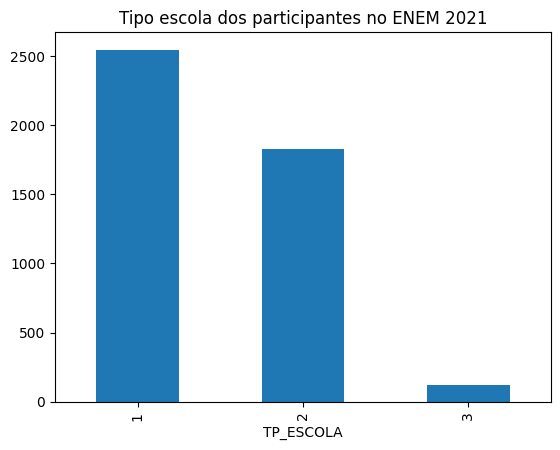

In [354]:
df.TP_ESCOLA.value_counts().plot(kind = 'bar')
plt.title('Tipo escola dos participantes no ENEM 2021')

<Axes: xlabel='TP_SEXO'>

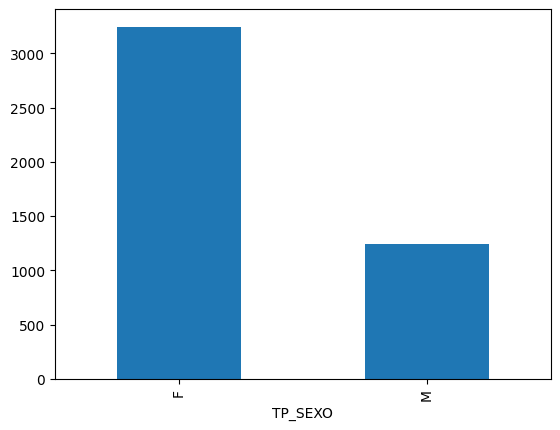

In [355]:
df.TP_SEXO.value_counts().plot(kind = 'bar')

Melhorando um pouco o plot:

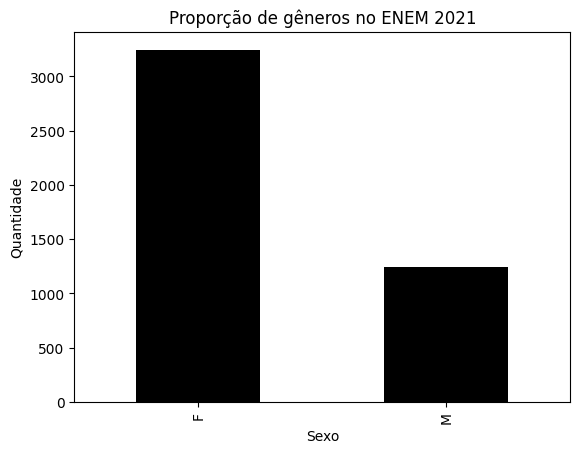

In [356]:
# gráfico de barras
df.TP_SEXO.value_counts().plot(kind = 'bar', color = 'black')
# título
plt.title('Proporção de gêneros no ENEM 2021')
# label do eixo x
plt.xlabel('Sexo')
# label do eixo y
plt.ylabel('Quantidade')

plt.show()
#plt.xlabel('Sexo');plt.ylabel('Quantidade');plt.show()

In [357]:
df.NO_MUNICIPIO_PROVA\
.value_counts()\
.reset_index()

,NO_MUNICIPIO_PROVA,count
0,Salvador,939
1,Feira de Santana,293
2,Vitória da Conquista,187
3,Barreiras,127
4,Juazeiro,92
...,...,...
156,Serra do Ramalho,1
157,Itabela,1
158,São Félix,1
159,São Francisco do Conde,1


# Gráfico de pizza

* Proporção entre os gêneros

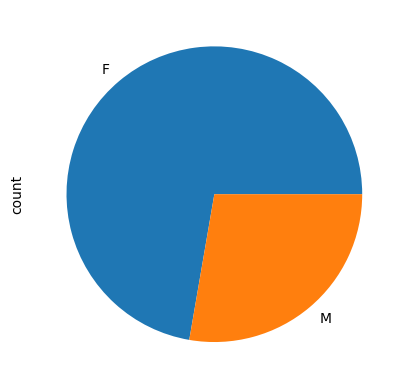

In [358]:
df.TP_SEXO.value_counts().plot(kind = 'pie');

* Tipo escola

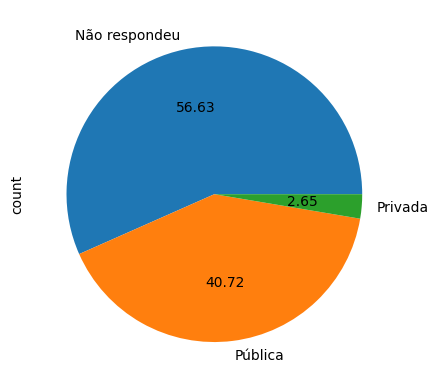

In [359]:
(
    df.TP_ESCOLA.map({1:'Não respondeu', 2:'Pública', 3:'Privada'})
    .value_counts()
    .plot(kind = 'pie',
          legend = False,
          autopct = '%.2f'
         )
);

Gráfico de dispersão das notas de Matemática e Ciências da Natureza:

<Axes: xlabel='NU_NOTA_MT', ylabel='NU_NOTA_CN'>

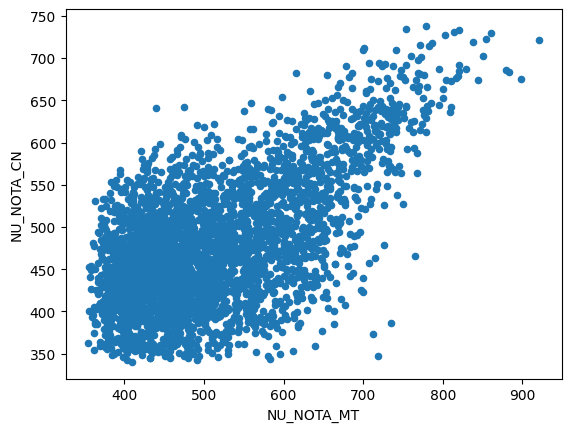

In [360]:
df.plot(kind = 'scatter', x = 'NU_NOTA_MT', y = 'NU_NOTA_CN')

Histograma

<Axes: ylabel='Frequency'>

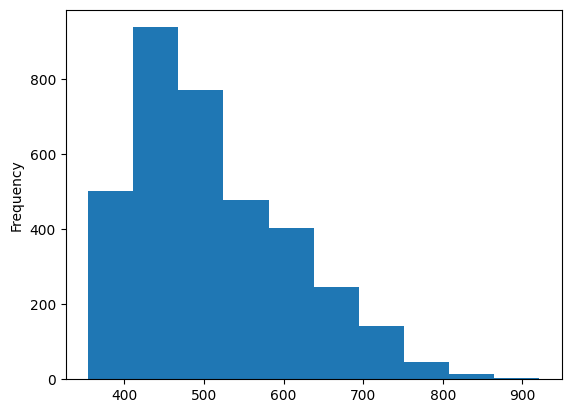

In [361]:
df.NU_NOTA_MT.plot(kind = 'hist')

Boxplot

<Axes: >

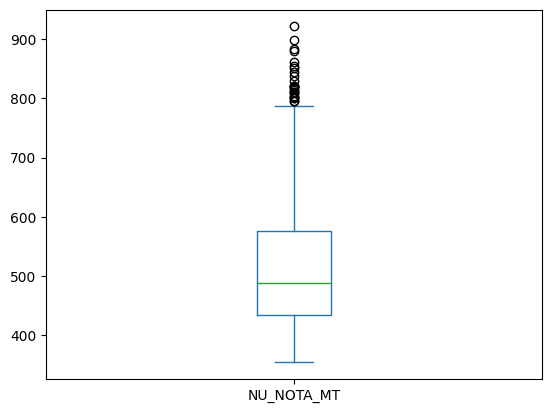

In [362]:
df.NU_NOTA_MT.plot(kind = 'box')

<Axes: >

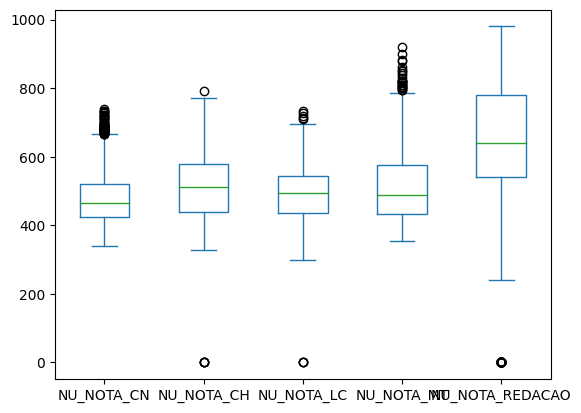

In [363]:
df[provas].plot(kind = 'box')

Kde (densidade)

<Axes: ylabel='Density'>

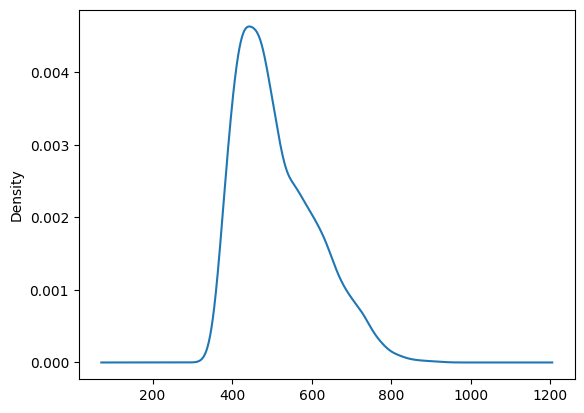

In [364]:
df.NU_NOTA_MT.plot(kind = 'kde')

Gráfico de linhas

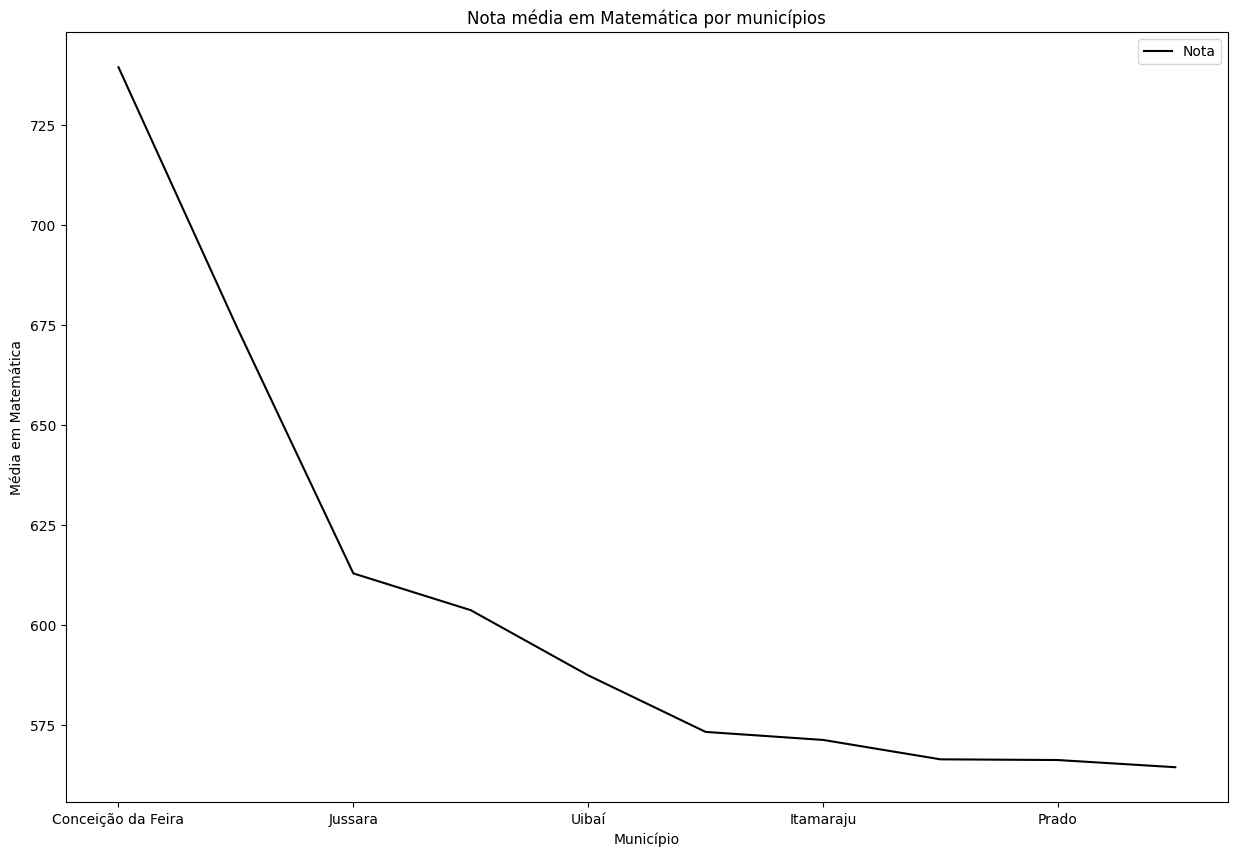

In [365]:
(
    df
    .groupby(by = ['NO_MUNICIPIO_PROVA'])
    .agg({'NU_NOTA_MT': np.mean})
    .reset_index()
    .rename(columns = {'NU_NOTA_MT' : 'Nota', 'NO_MUNICIPIO_PROVA': 'Município'})
    .nlargest(n = 10, columns = 'Nota')
    .plot(
        x       = 'Município',
        y       = 'Nota',
        figsize = (15, 10),
        color   = 'k',
        ylabel  = 'Média em Matemática',
        title   = 'Nota média em Matemática por municípios',
        #ylim    = [520, 545]

    )

);

# Ordenação

Em alguns casos precisamos ordenar os dados por alguma coluna ou conjunto de colunas. No Pandas podemos utilizar a função .sort_values().

In [366]:
provas = df.columns[(df.columns.str.contains('NOTA')) & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_INSCRICAO']

In [367]:
df_subset = df[idCandidato+provas].sample(n = 10, random_state = 9999)

In [368]:
# ordena o dataset em ordem decrescente
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
2406,210054455976,498.2,552.1,437.6,653.0,700.0
642,210053768984,461.5,400.5,495.1,611.6,640.0
704,210053927479,436.3,609.5,561.0,609.5,880.0
4028,210052839659,436.3,513.3,556.5,530.6,720.0
3615,210053061587,429.3,397.6,388.9,470.0,460.0
4461,210053794334,598.0,564.2,561.3,445.3,720.0
135,210051344264,484.4,555.0,471.9,440.2,680.0
550,210054217683,443.7,427.5,467.9,429.1,480.0
3029,210051285681,407.8,424.8,366.0,393.2,540.0
2849,210051191288,421.0,458.6,499.4,391.2,620.0


In [369]:
# ordena o dataset em ordem crescente
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = True)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
2849,210051191288,421.0,458.6,499.4,391.2,620.0
3029,210051285681,407.8,424.8,366.0,393.2,540.0
550,210054217683,443.7,427.5,467.9,429.1,480.0
135,210051344264,484.4,555.0,471.9,440.2,680.0
4461,210053794334,598.0,564.2,561.3,445.3,720.0
3615,210053061587,429.3,397.6,388.9,470.0,460.0
4028,210052839659,436.3,513.3,556.5,530.6,720.0
704,210053927479,436.3,609.5,561.0,609.5,880.0
642,210053768984,461.5,400.5,495.1,611.6,640.0
2406,210054455976,498.2,552.1,437.6,653.0,700.0


Podemos definir onde queremos inserir os valores ausentes com na_position.

In [370]:
df_subset.sort_values(by = ['NU_NOTA_MT'], na_position = 'first', ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
2406,210054455976,498.2,552.1,437.6,653.0,700.0
642,210053768984,461.5,400.5,495.1,611.6,640.0
704,210053927479,436.3,609.5,561.0,609.5,880.0
4028,210052839659,436.3,513.3,556.5,530.6,720.0
3615,210053061587,429.3,397.6,388.9,470.0,460.0
4461,210053794334,598.0,564.2,561.3,445.3,720.0
135,210051344264,484.4,555.0,471.9,440.2,680.0
550,210054217683,443.7,427.5,467.9,429.1,480.0
3029,210051285681,407.8,424.8,366.0,393.2,540.0
2849,210051191288,421.0,458.6,499.4,391.2,620.0


In [371]:
df_subset.sort_values(by = ['NU_NOTA_MT'], na_position = 'last', ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
2406,210054455976,498.2,552.1,437.6,653.0,700.0
642,210053768984,461.5,400.5,495.1,611.6,640.0
704,210053927479,436.3,609.5,561.0,609.5,880.0
4028,210052839659,436.3,513.3,556.5,530.6,720.0
3615,210053061587,429.3,397.6,388.9,470.0,460.0
4461,210053794334,598.0,564.2,561.3,445.3,720.0
135,210051344264,484.4,555.0,471.9,440.2,680.0
550,210054217683,443.7,427.5,467.9,429.1,480.0
3029,210051285681,407.8,424.8,366.0,393.2,540.0
2849,210051191288,421.0,458.6,499.4,391.2,620.0


Podemos efetuar a ordenação por mais de uma coluna:

In [372]:
df_subset.sort_values(by = ['NU_NOTA_MT', 'NU_NOTA_CN'], ascending = [False, False])

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
2406,210054455976,498.2,552.1,437.6,653.0,700.0
642,210053768984,461.5,400.5,495.1,611.6,640.0
704,210053927479,436.3,609.5,561.0,609.5,880.0
4028,210052839659,436.3,513.3,556.5,530.6,720.0
3615,210053061587,429.3,397.6,388.9,470.0,460.0
4461,210053794334,598.0,564.2,561.3,445.3,720.0
135,210051344264,484.4,555.0,471.9,440.2,680.0
550,210054217683,443.7,427.5,467.9,429.1,480.0
3029,210051285681,407.8,424.8,366.0,393.2,540.0
2849,210051191288,421.0,458.6,499.4,391.2,620.0


Podemos ainda aplicar a função .sort_values() para uma Series, neste caso não precisamos especificar o argumento by:

In [373]:
type(df.NU_NOTA_MT)

pandas.core.series.Series

In [374]:
df_subset.NU_NOTA_MT.sort_values()

2849    391.2
3029    393.2
550     429.1
135     440.2
4461    445.3
3615    470.0
4028    530.6
704     609.5
642     611.6
2406    653.0
Name: NU_NOTA_MT, dtype: float64

In [375]:
df_subset.NU_NOTA_MT.sort_values(ascending = True, na_position = 'first')

2849    391.2
3029    393.2
550     429.1
135     440.2
4461    445.3
3615    470.0
4028    530.6
704     609.5
642     611.6
2406    653.0
Name: NU_NOTA_MT, dtype: float64

Em alguns casos estamos interessados em criar um ranking. Vamos filtra a base para os candidatos que fizeram a prova em Salvador e posteriormente criar um top 10 na prova de Matemática.

In [376]:
df_subset = df.query('NO_MUNICIPIO_PROVA == "Salvador"')[idCandidato+provas]

In [377]:
df_subset

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,210054173438,NaN,NaN,NaN,NaN,NaN
6,210053741476,453.4,438.3,503.4,379.5,600.0
9,210054171092,NaN,NaN,NaN,NaN,NaN
14,210053702687,603.3,622.5,571.7,729.2,860.0
17,210054087112,414.6,420.5,368.6,399.4,480.0
...,...,...,...,...,...,...
4470,210053732663,444.1,491.3,402.5,498.7,440.0
4478,210052896369,NaN,NaN,NaN,NaN,NaN
4483,210053021680,401.1,460.2,462.2,395.3,560.0
4484,210051483594,NaN,NaN,NaN,NaN,NaN


In [378]:
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = False).iloc[:11, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
2016,210054170657,730.1,716.1,686.8,860.5,980.0
4397,210053243888,731.2,720.1,693.9,814.6,920.0
927,210053010934,673.4,687.9,634.4,810.6,880.0
1530,210051086181,673.6,660.6,616.5,803.8,920.0
3667,210052738350,663.9,693.5,577.3,800.3,560.0
1263,210053071195,687.1,662.6,595.4,795.5,920.0
2263,210054074634,637.9,679.0,658.4,775.8,920.0
4166,210054071009,701.4,694.4,644.4,772.7,800.0
3574,210053224975,587.2,695.0,632.9,767.9,900.0
3445,210053727215,593.5,641.7,565.7,763.3,760.0


Outra forma de fazer isso seria utilizando a função nlargest (para análise contrária podemos usar a função nsmallest):

In [379]:
df_subset.nlargest(n = 10, columns = 'NU_NOTA_MT')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
2016,210054170657,730.1,716.1,686.8,860.5,980.0
4397,210053243888,731.2,720.1,693.9,814.6,920.0
927,210053010934,673.4,687.9,634.4,810.6,880.0
1530,210051086181,673.6,660.6,616.5,803.8,920.0
3667,210052738350,663.9,693.5,577.3,800.3,560.0
1263,210053071195,687.1,662.6,595.4,795.5,920.0
2263,210054074634,637.9,679.0,658.4,775.8,920.0
4166,210054071009,701.4,694.4,644.4,772.7,800.0
3574,210053224975,587.2,695.0,632.9,767.9,900.0
3445,210053727215,593.5,641.7,565.7,763.3,760.0


Podemos ainda analisar por mais de 1 coluna:

In [380]:
df_subset.sort_values(by = ['NU_NOTA_MT', 'NU_NOTA_CN'], ascending = False).iloc[:10, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
2016,210054170657,730.1,716.1,686.8,860.5,980.0
4397,210053243888,731.2,720.1,693.9,814.6,920.0
927,210053010934,673.4,687.9,634.4,810.6,880.0
1530,210051086181,673.6,660.6,616.5,803.8,920.0
3667,210052738350,663.9,693.5,577.3,800.3,560.0
1263,210053071195,687.1,662.6,595.4,795.5,920.0
2263,210054074634,637.9,679.0,658.4,775.8,920.0
4166,210054071009,701.4,694.4,644.4,772.7,800.0
3574,210053224975,587.2,695.0,632.9,767.9,900.0
3445,210053727215,593.5,641.7,565.7,763.3,760.0


In [381]:
# caso houvesse duplicidade poderíamos passar o argumento keep
# keep = first : take the first occurrence.
# keep = last : take the last occurrence.
# keep = all : do not drop any duplicates, even it means selecting more than n items.
df_subset.nlargest(n = 10, columns = ['NU_NOTA_MT', 'NU_NOTA_CN'], keep = 'first')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
2016,210054170657,730.1,716.1,686.8,860.5,980.0
4397,210053243888,731.2,720.1,693.9,814.6,920.0
927,210053010934,673.4,687.9,634.4,810.6,880.0
1530,210051086181,673.6,660.6,616.5,803.8,920.0
3667,210052738350,663.9,693.5,577.3,800.3,560.0
1263,210053071195,687.1,662.6,595.4,795.5,920.0
2263,210054074634,637.9,679.0,658.4,775.8,920.0
4166,210054071009,701.4,694.4,644.4,772.7,800.0
3574,210053224975,587.2,695.0,632.9,767.9,900.0
3445,210053727215,593.5,641.7,565.7,763.3,760.0


In [382]:
df_subset.nsmallest(n = 10, columns = ['NU_NOTA_MT', 'NU_NOTA_CN'], keep = 'first')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1141,210053277749,426.6,419.1,358.4,358.1,500.0
4385,210052558033,354.5,389.5,392.6,361.2,620.0
2319,210051760578,404.8,537.0,512.8,361.6,740.0
688,210051850498,530.2,548.4,506.8,362.5,900.0
158,210051744901,420.3,567.1,570.9,366.5,800.0
3779,210054188392,457.6,437.6,529.9,366.7,500.0
1943,210053335601,407.6,435.6,446.8,368.0,560.0
3973,210051493619,423.3,541.9,487.4,368.1,640.0
1215,210054141402,485.0,464.3,456.3,370.2,680.0
591,210052193651,397.6,497.5,403.7,372.1,300.0


Índice



A indexação do Pandas conta as linhas e colunas a partir do zero, mas podemos alterar o índice default do DataFrame e ainda ordenar um DataFrame de acordo com seu índice. Em séries temporais alterar o índice default pode facilitar o trabalho de filtro de datas.

* set_index()

In [383]:
df_subset.set_index('NU_INSCRICAO', inplace = True)

In [384]:
df_subset.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
210054173438,NaN,NaN,NaN,NaN,NaN
210053741476,453.4,438.3,503.4,379.5,600.0
210054171092,NaN,NaN,NaN,NaN,NaN
210053702687,603.3,622.5,571.7,729.2,860.0
210054087112,414.6,420.5,368.6,399.4,480.0


* sort_index()

In [385]:
# ordena o dataset de acordo com o índice
df_subset.sort_index().head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
210051020566,541.5,472.5,462.8,443.4,540.0
210051021902,380.5,451.3,431.6,430.7,580.0
210051023154,NaN,NaN,NaN,NaN,NaN
210051024730,445.0,544.0,524.5,559.5,520.0
210051034207,NaN,NaN,NaN,NaN,NaN


Podemos escolhar mais de uma coluna como índice do DataFrame, com efeito criamos um MultiIndex.

In [386]:
df_test = df.copy().sample(10)
df_test = df_test.set_index(['NO_MUNICIPIO_PROVA', 'TP_SEXO'])

In [387]:
df_test

,,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
NO_MUNICIPIO_PROVA,TP_SEXO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Irará,M,210053810542,2021,2,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914505,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,486.0,600.0,519.4,589.3,AABCDDEABCCABDBDBBCBDDCCDBADBDDBEDCACCCCDCAEE,EAABEAECEABBBDACECBBAEBDCEDECBDABCEBAEBECAEAB,99999ECACADEEECCDDADBEEACBDDCDCADBECEAACEDDACC...,DCEAECBCABDCEDBCBBCDADCDBCECBDEBDCBCADCBDBDEC,1.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,140.0,200.0,180.0,140.0,200.0,860.0
Salvador,M,210051505373,2021,16,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ipiaú,F,210054128766,2021,4,1,3,2,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913903,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,652.5,662.3,546.0,800.0,EAACEDEBBEDDCABEADCBCACCBACCAEBCBDCBCBDCBCBDB,EAAAEADACACABABEECAAABEDBBAECBADBCADBABBCACCB,99999CCEDADBDACDBCACBDEABDCAAAECDDDCBBCDDDDBAB...,DCCAEBACDDCADEECCBCBEDADDCEBCDEBEBCABBDCDCADE,1.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,180.0,160.0,200.0,200.0,900.0
Catu,F,210054104184,2021,5,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2907509,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,568.8,659.9,623.4,670.0,ACCACACDAECDCCECECBAABDDEDDCECCBECDAEDBACBCAC,CDECCADBAEDDABAAEBCABBECCAEABEBAABBBBABAAEEDB,99999CCEAABDCDEADCBCBEDDDABBEEBEBCBEDBBDDECADC...,DDBCBCCCDEDEDDBBACDDDBEDCAADBBDDCCDDCAEBCCEAB,1.0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,140.0,120.0,120.0,160.0,160.0,700.0
Teixeira de Freitas,F,210051782237,2021,2,1,2,1,2,0,2,1.0,0,2931350.0,Teixeira de Freitas,29.0,BA,2.0,1.0,1.0,2931350,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,537.6,495.1,519.4,575.3,DABCADABEBEADCBDBADABADCAAECECBBED*CCBAEDEACD,EBCAAEBAEDEBCDABEEABCDADAEADCDDABDDEAEDBCAEBD,BCAEB99999DCBEACBBEDCAECBADABADBDECBDABCECCEAD...,DCEAEDBADBCBAEAACEBCAECACDBECEBDCEACBBDCAABEA,0.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,180.0,100.0,160.0,120.0,680.0
Feira de Santana,F,210054136543,2021,2,1,1,1,2,0,2,1.0,0,2910800.0,Feira de Santana,29.0,BA,2.0,1.0,1.0,2910800,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,431.0,595.9,602.9,641.8,ACBCDBDEECDBDCDABBBCDEACABBEEEDACAABCADDCCEBD,CCAACACBEAEABBBEABBACEEDABADCDADBBCEAABBCEEDE,ACABB99999DBEACEBDADBBEABDCAEBDABDDBDABCDCDECB...,DCCAEBBACDEDDEECCBBAAEABDDCABDEADCBADCBEDBBED,0.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,140.0,200.0,140.0,160.0,180.0,820.0
Boquira,F,210051708719,2021,1,0,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2904100,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,388.3,429.2,447.8,450.8,DAE

In [388]:
type(df_test.index)

pandas.core.indexes.multi.MultiIndex

* reset_index()

Para retornar ao dataset original:

In [389]:
df_subset = df_subset.reset_index(drop = False)

In [390]:
df_subset.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,210054173438,NaN,NaN,NaN,NaN,NaN
1,210053741476,453.4,438.3,503.4,379.5,600.0
2,210054171092,NaN,NaN,NaN,NaN,NaN
3,210053702687,603.3,622.5,571.7,729.2,860.0
4,210054087112,414.6,420.5,368.6,399.4,480.0


# Agregação/Sumarização

Nesta seção vamos aprender a aplicar medidas para sumarizar dados, tais como soma, contagem, média, mediana, etc.

Em geral para aplicar uma função de agregação em uma coluna a sintaxe será :

df.column.agg_function()

Função|Descrição
------|----------
df.sum()|Soma
df.count()|Contagem
df.abs()|Valor absoluto
df.cumsum()|Soma cumulativa
df.cumprod()|Produto cumulativo
df.min()|Mínimo
df.max()|Máximo
df.mean()|Média
df.median()|Mediana
df.mode()|Moda
df.var()|Variância
df.std()|Desvio Padrão
df.mad()|Desvio Médio Absoluto
df.skew()|Medida de Assimetria da Distribuição
df.kurtosis()|Curtose
df.corr()|Correlação
df.cov()|Covariância
df.quantile()|Quantil

Agora vejamos alguns exemplos:

In [391]:
# média das provas
df[provas].mean()

NU_NOTA_CN         478.119763
NU_NOTA_CH         511.791166
NU_NOTA_LC         491.759038
NU_NOTA_MT         511.975974
NU_NOTA_REDACAO    646.269712
dtype: float64

In [392]:
# moda da variável sexo
df['TP_SEXO'].mode()

0    F
Name: TP_SEXO, dtype: object

A função .agg() permite aplicar mais de uma função de agregação ou operações ao longo dos eixos. Aggregate using one or more operations over the specified axis. Neste caso podemos inserir funções de agregação do NumPy.

In [393]:
# valor máximo das provas
# df[provas].agg(max)
df[provas].agg(np.max)

NU_NOTA_CN         738.0
NU_NOTA_CH         790.5
NU_NOTA_LC         732.4
NU_NOTA_MT         921.1
NU_NOTA_REDACAO    980.0
dtype: float64

Para aplicar mais de uma função de agregação podemos passar uma lista contendo todas as agregações desejadas:

In [394]:
df[provas].agg([np.min, np.max, np.mean])

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
min,340.300000,0.000000,0.000000,354.500000,0.000000
max,738.000000,790.500000,732.400000,921.100000,980.000000
mean,478.119763,511.791166,491.759038,511.975974,646.269712


Podemos mudar o eixo de aplicação das funções de agregaçaõ. Isto é, podemos aplicar uma soma nas linhas ou nas colunas, por exemplo.

In [395]:
# média das colunas
df[provas].mean(axis = 0)

NU_NOTA_CN         478.119763
NU_NOTA_CH         511.791166
NU_NOTA_LC         491.759038
NU_NOTA_MT         511.975974
NU_NOTA_REDACAO    646.269712
dtype: float64

In [396]:
# média das linhas
df[provas].mean(axis = 1)

0       466.940
1           NaN
2       447.880
3       562.100
4       544.000
         ...   
4487    504.140
4488    543.320
4489    592.600
4490    747.740
4491    426.325
Length: 4492, dtype: float64

Observe que no primeiro caso nosso objetivo foi analisar a média geral dos alunos da amostra. No segundo caso, fizemos o cálculo da média de cada aluno nas provas.

Em alguns casos estamos interessados em obter o valor máximo, mas também obter a linha deste registro. Idem para o mínimo. Neste caso, podemos usar as funções idxmin() e idxmax(). Para séries temporais tal análise é importante, pois conseguimos obter, por exemplo, a data de ocorrência do valor máximo ou mínimo.

In [397]:
# valor máximo, índice de ocorrência do valor máximo
df.NU_NOTA_MT.max(), df.NU_NOTA_MT.idxmax()

(921.1, 4072)

In [398]:
# verifica o resultado anterior
df.iloc[df.NU_NOTA_MT.idxmax(), ]

NU_INSCRICAO                                                   210053266819
NU_ANO                                                                 2021
TP_FAIXA_ETARIA                                                           4
TP_SEXO                                                                   M
TP_ESTADO_CIVIL                                                           1
TP_COR_RACA                                                               3
TP_NACIONALIDADE                                                          1
TP_ST_CONCLUSAO                                                           1
TP_ANO_CONCLUIU                                                           2
TP_ESCOLA                                                                 1
TP_ENSINO                                                               NaN
IN_TREINEIRO                                                              0
CO_MUNICIPIO_ESC                                                        NaN
NO_MUNICIPIO

# Transformação de dados

Nesta seção vamos aprender algumas técnicas de transformação dos dados.

In [399]:
df_ssa = df[df.NO_MUNICIPIO_PROVA == 'Salvador'][idCandidato+provas].sample(10, random_state = 10)

Vamos criar duas novas colunas:

Média das provas Objetivas
Média Global
Vejamos algumas formas distintas de alcançar este objetivo.

In [400]:
provas_objetivas = provas.copy()
provas_objetivas.remove('NU_NOTA_REDACAO')

Uma forma de fazer isso seria:

In [401]:
df_ssa['NU_MEDIA_OBJ_1'] = (df_ssa['NU_NOTA_CN']+df_ssa['NU_NOTA_CH']+df_ssa['NU_NOTA_LC']+df_ssa['NU_NOTA_MT'])/4

In [402]:
df_ssa['NU_MEDIA_OBJ_1']

2997    573.800
1495    581.175
919     438.600
2763        NaN
1455        NaN
1025    572.900
2731        NaN
2724    433.650
321     429.000
3502        NaN
Name: NU_MEDIA_OBJ_1, dtype: float64

Usando função de agregação:

In [403]:
df_ssa[provas_objetivas].mean(axis = 1)

2997    573.800
1495    581.175
919     438.600
2763        NaN
1455        NaN
1025    572.900
2731        NaN
2724    433.650
321     429.000
3502        NaN
dtype: float64

In [404]:
df_ssa[provas_objetivas].agg(func = np.mean, axis = 1)

2997    573.800
1495    581.175
919     438.600
2763        NaN
1455        NaN
1025    572.900
2731        NaN
2724    433.650
321     429.000
3502        NaN
dtype: float64

Uma pequena diferença se usarmos uma lista dentro do argumento func:

In [405]:
df_ssa[provas_objetivas].agg(func = [np.mean], axis = 1)

,mean
2997,573.800
1495,581.175
919,438.600
2763,NaN
1455,NaN
1025,572.900
2731,NaN
2724,433.650
321,429.000
3502,NaN


Outra forma de fazermos isso seria utilizando a função pd.eval() ou ainda a função assign:

In [406]:
df_ssa.eval('(NU_NOTA_CN+NU_NOTA_CH+NU_NOTA_LC+NU_NOTA_MT) / 4')

2997    573.800
1495    581.175
919     438.600
2763        NaN
1455        NaN
1025    572.900
2731        NaN
2724    433.650
321     429.000
3502        NaN
dtype: float64

In [407]:
df_ssa.assign(media_obj = (df_ssa.NU_NOTA_MT+df_ssa.NU_NOTA_CN+df_ssa.NU_NOTA_LC+df_ssa.NU_NOTA_CH) / 4)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_MEDIA_OBJ_1,media_obj
2997,210051167024,529.4,615.8,568.2,581.8,940.0,573.800,573.800
1495,210053716702,554.6,611.3,571.5,587.3,780.0,581.175,581.175
919,210053369822,396.8,540.2,417.8,399.6,600.0,438.600,438.600
2763,210052254732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1455,210051501823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025,210051358832,373.4,630.9,575.3,712.0,760.0,572.900,572.900
2731,210052315698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2724,210052953164,420.1,368.8,463.5,482.2,460.0,433.650,433.650
321,210051126721,379.8,455.5,401.1,479.6,520.0,429.000,429.000
3502,210051884241,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Em algumas análises podemos tomar o log de uma determinada variável, veremos mais sobre isso na aula de Estatística Básica.

In [408]:
np.log(df_ssa.NU_NOTA_MT)

2997    6.366127
1495    6.375536
919     5.990464
2763         NaN
1455         NaN
1025    6.568078
2731         NaN
2724    6.178359
321     6.172952
3502         NaN
Name: NU_NOTA_MT, dtype: float64

In [409]:
df_ssa = df_ssa.assign(
    log_nota_mt = lambda col: np.log(col.NU_NOTA_MT) ,
    log_nota_cn = lambda col: np.log(col.NU_NOTA_CN) ,
    log_nota_ch = lambda col: np.log(col.NU_NOTA_CH) ,
    log_nota_lc = lambda col: np.log(col.NU_NOTA_LC)
             )

Podemos usar ainda a função .apply():

In [410]:
df_ssa[provas_objetivas].apply(lambda col: np.log(col))

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
2997,6.271744,6.422922,6.342473,6.366127
1495,6.318247,6.415588,6.348264,6.375536
919,5.983432,6.291939,6.035003,5.990464
2763,NaN,NaN,NaN,NaN
1455,NaN,NaN,NaN,NaN
1025,5.922650,6.447147,6.354892,6.568078
2731,NaN,NaN,NaN,NaN
2724,6.040493,5.910254,6.138806,6.178359
321,5.939645,6.121396,5.994211,6.172952
3502,NaN,NaN,NaN,NaN


Aplicando funções

map()

percorre item por item e aplica uma função desejada.
Neste exemplo, vamos percorrer cada valor de renda e aplicar a função np.log().

In [411]:
df.query('NU_NOTA_MT != 0').NU_NOTA_MT.map(np.log)

0       6.024174
1            NaN
2       6.100767
3       5.957391
4       6.362338
          ...   
4487    5.887215
4488    6.227919
4489    6.332213
4490    6.576609
4491    5.906179
Name: NU_NOTA_MT, Length: 4492, dtype: float64

Podemos usar a funçaõ map() para transformar variáveis. Na coluna TP_COR_RACA temos informações de cor/raça do candidato.

In [412]:
# 0 : Não declarado
# 1 : Branca
# 2 : Preta
# 3 : Parda
# 4 : Amarela
# 5 : Indígena

In [413]:
np.sort(df.TP_COR_RACA.unique())

array([0, 1, 2, 3, 4, 5])

In [414]:
mapear_valores_cor_raca = {
    0 : 'Não declarado',
    1 : 'Branca',
    2 : 'Preta',
    3 : 'Parda',
    4 : 'Amarela',
    5 : 'Indígena'
}

In [415]:
df.TP_COR_RACA.map(mapear_valores_cor_raca)

0       Parda
1       Preta
2       Parda
3       Preta
4       Preta
        ...  
4487    Parda
4488    Preta
4489    Preta
4490    Preta
4491    Preta
Name: TP_COR_RACA, Length: 4492, dtype: object

Podemos usar também a função replace:

In [416]:
df.TP_SEXO.replace({'M': 'Masculino', 'F' : 'Feminino'})

0        Feminino
1        Feminino
2        Feminino
3        Feminino
4       Masculino
          ...    
4487     Feminino
4488     Feminino
4489    Masculino
4490     Feminino
4491     Feminino
Name: TP_SEXO, Length: 4492, dtype: object

apply()

podemos aplicar uma função em todas as linhas ou em todas as colunas (ou seja, aplica uma função em um determinado eixo).

In [417]:
def resultado_candidato(nota):
    if nota < 600 :
        return 'Reprovado'
    else:
        return 'Aprovado'

In [418]:
df[df.NU_NOTA_MT.notna()].NU_NOTA_MT.apply(resultado_candidato)

0       Reprovado
2       Reprovado
3       Reprovado
4       Reprovado
5       Reprovado
          ...    
4487    Reprovado
4488    Reprovado
4489    Reprovado
4490     Aprovado
4491    Reprovado
Name: NU_NOTA_MT, Length: 3542, dtype: object

Podemos usar apply() para transformar uma coluna:

In [419]:
def mapear_tipo_escola(tipo_escola):
    if tipo_escola == 1:
        return 'Não respondeu'
    elif tipo_escola == 2:
        return 'Pública'
    else:
        return 'Privada'

In [420]:
df.TP_ESCOLA.apply(mapear_tipo_escola)

0             Pública
1             Pública
2             Pública
3       Não respondeu
4       Não respondeu
            ...      
4487    Não respondeu
4488    Não respondeu
4489          Pública
4490    Não respondeu
4491    Não respondeu
Name: TP_ESCOLA, Length: 4492, dtype: object

In [421]:
df.TP_SEXO.apply(lambda col: 'Masculino' if col == 'M' else 'Feminino')

0        Feminino
1        Feminino
2        Feminino
3        Feminino
4       Masculino
          ...    
4487     Feminino
4488     Feminino
4489    Masculino
4490     Feminino
4491     Feminino
Name: TP_SEXO, Length: 4492, dtype: object

# Agrupamento

Anteriormente aprendemos a aplicar funções de agregação de forma genérica para uma ou mais variáveis. Algo muito como quando estamos analisando dados é obter tais medidas agrupadas. Ou seja, qual a média da prova de matemática por gênero?

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png" height=400 width=400>

O flow é o seguinte:

split: os dados são separados de acordo com seus grupos (A, B, C).
apply: após o split aplica-se a função de agregação desejada, neste caso a função sum().
combine: o resultado final é combinado.
Então note que, após separar os grupos e aplicar a soma para cada grupo, obtemos um dataset final com o resultado desta operação (split-apply-combine).

Vamos usar esta seção para responder as seguintes perguntas:

Qual a proporção de gênero entre os candidatos?
Qual a média das provas por tipo de escola?

In [422]:
# grupos
df.groupby(by = ['TP_SEXO']).groups

{'F': [0, 1, 2, 3, 6, 8, 11, 12, 14, 16, 18, 19, 20, 23, 24, 25, 26, 29, 30, 31, 33, 34, 35, 36, 38, 39, 41, 43, 44, 45, 46, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 104, 106, 107, 109, 110, 111, 112, 115, 116, 117, 118, 120, 121, 122, 123, 126, 127, 128, 129, 131, 132, 133, ...], 'M': [4, 5, 7, 9, 10, 13, 15, 17, 21, 22, 27, 28, 32, 37, 40, 42, 47, 48, 49, 67, 69, 72, 75, 82, 98, 99, 105, 108, 113, 114, 119, 124, 125, 130, 134, 139, 142, 143, 145, 147, 151, 155, 168, 172, 176, 181, 182, 183, 194, 195, 197, 199, 203, 204, 206, 218, 223, 225, 228, 230, 231, 235, 240, 245, 247, 248, 249, 250, 255, 256, 258, 260, 264, 265, 278, 280, 283, 284, 291, 298, 299, 302, 304, 305, 309, 310, 311, 316, 321, 323, 325, 330, 333, 339, 343, 350, 351, 354, 356, 364, ...]}

In [423]:
# proporção de gênero
df.groupby(by = ['TP_SEXO'])[idCandidato].count()

,NU_INSCRICAO
TP_SEXO,
F,3247
M,1245


De forma análoga poderíamos usar a função .value_counts(), que retorna a distribuição de frequências da variável.

In [424]:
df.TP_SEXO.value_counts()

TP_SEXO
F    3247
M    1245
Name: count, dtype: int64

Agora vamos criar uma nova coluna no nosso dataset original, para mapear os valores numéricos em suas respectivas categorias. Seguidamente vamos verificar a nota média nas provas por tipo de escola.

In [425]:
df['TP_ESCOLA_CAT'] = df.TP_ESCOLA.map({1 : 'Não respondeu', 2: 'Pública', 3: 'Privada'})

In [426]:
df.groupby(by = ['TP_ESCOLA_CAT'])[provas].agg(np.mean).sort_values(by = ['NU_NOTA_MT'], ascending = False)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_ESCOLA_CAT,,,,,
Privada,527.905310,570.410526,549.148246,580.774336,758.421053
Não respondeu,486.382408,521.402365,498.829441,522.225550,656.092649
Pública,464.026662,495.453992,478.710076,493.970112,625.804816


In [427]:
# A maior parcela dos alunos são da categoria Não respondeu.
np.multiply(df['TP_ESCOLA_CAT'].value_counts(normalize = True), 100).round(2)

TP_ESCOLA_CAT
Não respondeu    56.63
Pública          40.72
Privada           2.65
Name: proportion, dtype: float64

Para não comprometer nossa análise vamos remover a categoria Não respondeu.

In [428]:
# distribuição de frequências em termos absolutos
df.query('TP_ESCOLA_CAT != "Não respondeu"')['TP_ESCOLA_CAT'].value_counts(normalize = False)

TP_ESCOLA_CAT
Pública    1829
Privada     119
Name: count, dtype: int64

In [429]:
# distribuição de frequências em termos relativos
np.multiply(df.query('TP_ESCOLA_CAT != "Não respondeu"')['TP_ESCOLA_CAT'].value_counts(normalize = True),
            100)\
.round()

TP_ESCOLA_CAT
Pública    94.0
Privada     6.0
Name: proportion, dtype: float64

Para evitar repetição e construir um código mais limpo poderíamos fazer da seguinte forma:

In [430]:
subset_tp_escola = df[df.TP_ESCOLA_CAT != 'Não respondeu']
# distribuição de frequência em termos relativos
display(subset_tp_escola.TP_ESCOLA_CAT.value_counts(normalize = True))
# distribuição de frequência em termos absolutos
display(subset_tp_escola.TP_ESCOLA_CAT.value_counts(normalize = False))

TP_ESCOLA_CAT
Pública    0.938912
Privada    0.061088
Name: proportion, dtype: float64

TP_ESCOLA_CAT
Pública    1829
Privada     119
Name: count, dtype: int64

Agora vamos obter a média das notas por tipo de escola:

In [431]:
subset_tp_escola\
.groupby(by = ['TP_ESCOLA_CAT'])[provas]\
.agg(np.mean)\
.sort_values(by = ['NU_NOTA_MT'], ascending = False)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_ESCOLA_CAT,,,,,
Privada,527.905310,570.410526,549.148246,580.774336,758.421053
Pública,464.026662,495.453992,478.710076,493.970112,625.804816


Utilizaremos agora mais de uma coluna para agrupar a nossa amostra e aplicaremos várias funções de agregação.

In [432]:
# análise apenas para a prova de matemática
(
    subset_tp_escola
    .groupby(by = ['TP_ESCOLA_CAT', 'TP_LOCALIZACAO_ESC'], as_index = False)['NU_NOTA_MT']
    .agg([np.mean])
)

,TP_ESCOLA_CAT,TP_LOCALIZACAO_ESC,mean
0,Privada,1.0,597.323457
1,Pública,1.0,512.231217
2,Pública,2.0,484.086364


In [433]:
# análise para todas as provas
(subset_tp_escola
 .groupby(by = ['TP_ESCOLA_CAT', 'TP_LOCALIZACAO_ESC'])[provas]
 .agg([np.min, np.mean, np.median, np.std, np.max])
 .transpose()
)

TP_ESCOLA_CAT              Privada     Pública            
TP_LOCALIZACAO_ESC             1.0         1.0         2.0
NU_NOTA_CN      min     369.300000  342.800000  348.300000
                mean    535.253086  474.624339  438.081818
                median  523.900000  465.100000  443.000000
                std      82.244105   68.052306   50.569440
                max     730.100000  719.300000  541.000000
NU_NOTA_CH      min     354.800000  341.100000  335.900000
                mean    583.163415  509.252284  478.976190
                median  583.550000  510.700000  484.300000
                std      81.495168   85.894718   76.316158
                max     752.800000  771.800000  601.000000
NU_NOTA_LC      min     398.700000  302.300000  316.900000
                mean    559.639024  487.879188  457.647619
                median  556.900000  490.200000  459.300000
                std      56.920345   71.643202   65.228756
                max     732.400000  693.900000  588.500000
NU_NOTA_MT      min     389.200000  356.000000  383.600000
                mean    597.323457  512.231217  484.086364
                median  607.500000  496.400000  464.800000
                std     113.046492   91.275087   76.643580
                max     879.100000  838.300000  648.900000
NU_NOTA_REDACAO min     460.000000    0.000000    0.000000
                mean    755.609756  643.181049  631.428571
                median  770.000000  640.000000  660.000000
                std     136.626892  178.618140  216.570675
                max     980.000000  960.000000  860.000000

Com a função .agg() conseguimos também aplicar funções de agregação distintas para cada coluna:

In [434]:
(
    subset_tp_escola
    .groupby(by = ['TP_ESCOLA_CAT'])
    .agg(
        {
            'NU_NOTA_MT': [np.mean, np.median],
            'NU_NOTA_CN': [np.min, np.max]
        }

        )
)

NU_NOTA_MT        NU_NOTA_CN       
                     mean median        min    max
TP_ESCOLA_CAT                                     
Privada        580.774336  573.5      369.3  730.1
Pública        493.970112  476.0      342.3  719.3

# Join e concat

No Pandas `pd.merge()` é uma função utilizada para unir datasets por meio de uma coluna que seja comum para ambos. Frequentemente precisamos consultar dados em várias tabelas e consolidar em uma tabela final. Vamos imaginar que precisamos construir uma tabela com dados cadastrais dos clientes de uma empresa. Provável que estes dados estejam espalhados ao longo de várias tabelas.

Exemplo:

* tb_cadastro
* tb_celular
* tb_endereco
* tb_tempo_relacionamento

Comum a todas as tabelas será provavelmente alguma coluna como o id do cliente (primary key). Desta forma, para consolidar todas as informações cadastrais dos clientes em uma única tabela precisaríamos percorrer várias tabelas e fazer um join. Ocorre ainda a possibilidade de termos que consolidar outros dados por meio de transformação de variáveis e consolidar nesta tabela cadastral, pense por exemplo se a necessidade fosse conta quantas compras este consumidor fez no último mês.


Vejamos os principais parâmetros da função merge (neste caso em ambos os datasets, temos que o nome da coluna em comum seja o mesmo):

```python
df_left.merge(df_right, on = 'column', how = 'left|right|outer|inner')
```

Caso o nome da coluna em comum seja distinta entre os datasets então teríamos:


```python
df_left.merge(df_right, left_on = 'column_left', right_on = 'column_right', how = 'inner')
```


Tipos de joins

<img src = 'https://datascience.quantecon.org/_images/merge_venns.png' width = 400 />


Vejamos agora exemplos práticos.

In [435]:
customer_1 = pd.DataFrame({
    'id_customer': [1, 2, 3, 4, 5],
    'occupation': ['Data Scientist', 'Economist', 'Data Scientist', 'Data Engineer', 'Data Scientist']
})

In [436]:
customer_2 = pd.DataFrame({
    'id_customer': [2, 3, 4, 5],
    'experience': [10, 3, 2, 4]
})

In [437]:
display(customer_1, customer_2)

,id_customer,occupation
0,1,Data Scientist
1,2,Economist
2,3,Data Scientist
3,4,Data Engineer
4,5,Data Scientist


,id_customer,experience
0,2,10
1,3,3
2,4,2
3,5,4


In [438]:
pd.merge(customer_1, customer_2)

,id_customer,occupation,experience
0,2,Economist,10
1,3,Data Scientist,3
2,4,Data Engineer,2
3,5,Data Scientist,4


In [439]:
customer_merged = pd.merge(customer_1, customer_2, on = 'id_customer', how = 'inner')

In [440]:
customer_merged

,id_customer,occupation,experience
0,2,Economist,10
1,3,Data Scientist,3
2,4,Data Engineer,2
3,5,Data Scientist,4


In [441]:
customer_3 = pd.DataFrame({
    'id_customer': [2, 3, 5, 8],
    'State': ['BA', 'SP', 'SP', 'RJ']
})

In [442]:
pd.merge(customer_merged, customer_3, on = 'id_customer')

,id_customer,occupation,experience,State
0,2,Economist,10,BA
1,3,Data Scientist,3,SP
2,5,Data Scientist,4,SP


In [443]:
customer_4 = pd.DataFrame({
    'id_customer': [2, 2, 2, 5, 5],
    'order_date': [2019, 2020, 2022, 2017, 2022]
})

In [444]:
pd.merge(customer_merged, customer_4)

,id_customer,occupation,experience,order_date
0,2,Economist,10,2019
1,2,Economist,10,2020
2,2,Economist,10,2022
3,5,Data Scientist,4,2017
4,5,Data Scientist,4,2022


In [445]:
customer_5 = pd.DataFrame({
    'customer_number': [1, 2, 3, 4, 5, 10, 11, 12, 13],
    'age': [40, 33, 27, 35, 39, 44, 25, 23, 29]
})

In [446]:
pd.merge(customer_1, customer_5, left_on = 'id_customer', right_on = 'customer_number', how = 'inner')\
.drop(columns = 'customer_number')

,id_customer,occupation,age
0,1,Data Scientist,40
1,2,Economist,33
2,3,Data Scientist,27
3,4,Data Engineer,35
4,5,Data Scientist,39


In [447]:
customer_1_modified = customer_1.set_index('id_customer')

In [448]:
customer_2_modified = customer_2.set_index('id_customer')

In [449]:
pd.merge(
    customer_1_modified,
    customer_2_modified,
    left_index = True,
    right_index = True,
)\
.reset_index()

,id_customer,occupation,experience
0,2,Economist,10
1,3,Data Scientist,3
2,4,Data Engineer,2
3,5,Data Scientist,4


In [450]:
customer_1_modified.join(customer_2_modified, how = 'inner')

,occupation,experience
id_customer,,
2,Economist,10
3,Data Scientist,3
4,Data Engineer,2
5,Data Scientist,4


In [451]:
order = pd.DataFrame({'id_customer': [3, 5],
                      'order_name': ['Book', 'Car']
                     })

In [452]:
customer_1

,id_customer,occupation
0,1,Data Scientist
1,2,Economist
2,3,Data Scientist
3,4,Data Engineer
4,5,Data Scientist


In [453]:
pd.merge(customer_1, order, how = 'inner')

,id_customer,occupation,order_name
0,3,Data Scientist,Book
1,5,Data Scientist,Car


In [454]:
pd.merge(order, customer_1, how = 'left')

,id_customer,order_name,occupation
0,3,Book,Data Scientist
1,5,Car,Data Scientist


In [455]:
pd.merge(order, customer_1, how = 'right').fillna(0)

,id_customer,order_name,occupation
0,1,0,Data Scientist
1,2,0,Economist
2,3,Book,Data Scientist
3,4,0,Data Engineer
4,5,Car,Data Scientist


In [456]:
pd.merge(order, customer_1, how = 'outer')

,id_customer,order_name,occupation
0,3,Book,Data Scientist
1,5,Car,Data Scientist
2,1,NaN,Data Scientist
3,2,NaN,Economist
4,4,NaN,Data Engineer


# Principais funções e comandos do Pandas

**Insepação de dados**

```python
df.head()

df.tail()

df.shape

df.info()

df.dtypes
```

**Manipulação de dados**
```python

# seleção de colunas

df.iloc[:, :]

df.loc[:, :]

# criação de colunas
df['new_column_1'] = (df['old_column'] / df['A'] * 100)
df_new = df.assign(new_column_2 = df['old_column'] * 5)

# remoção de colunas
df.drop(columns = ['column_1', 'column_2'])

# filtro

df.query('(column_A == 1) & (column_B != "value")')

df[(df.column_A == 1) | (df.column_B != 'value')]

df.loc[(df.column_A <= 2) & (df.column_C > 10)]



```



**Leitura de dados**

```python

pd.read_csv(filepath, sep, header, index_col, skiprows, na_values)

```

**Sumarização de dados**
```python
df.describe(include = 'all')
```

**Visualização de dados**

```python

# bar plot
df.column.value_counts().plot(kind = 'bar')

# pie plot
df.column.value_counts().plot(kind = 'pie')

# box plot
df.column.plot(kind = 'box')
```




